In [1]:
import pandas as pd 
data_month = pd.read_csv('./Python/抖音商城运营-总助数据统计及分析/上月订单数据.csv',
                         encoding='gbk').dropna(axis=1, how='all')
data_cust_month = pd.read_csv('./Python/抖音商城运营-总助数据统计及分析/上半月订单数据.csv',
                              encoding='gbk').dropna(axis=1, how='all')
data_week = pd.read_csv('./Python/抖音商城运营-总助数据统计及分析/近7天订单数据.csv',
                        encoding='gbk').dropna(axis=1, how='all')


In [2]:
#表的拼接
data = data_month.append(data_cust_month)
data = data.append(data_week)

C:\Users\yangqingqing\AppData\Local\Temp\ipykernel_4260\1546641077.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_month.append(data_cust_month)
C:\Users\yangqingqing\AppData\Local\Temp\ipykernel_4260\1546641077.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_week)


In [3]:
#删除一些字段前后的空格
for i in ['选购商品', '商品规格', '订单提交时间', '支付方式', '订单完成时间', '支付完成时间']:
    data_week[i] = data_week[i].astype(str).str.strip()
    data_cust_month[i] = data_cust_month[i].astype(str).str.strip()
    data_month[i] = data_month[i].astype(str).str.strip()
    data[i] = data[i].astype(str).str.strip()

In [4]:
#删除分析没用到的数据
data_month = data_month.drop(['预约发货时间', '仓库ID','所属门店ID',
                              '发货主体','发货主体明细','详细地址','收件人手机号','收件人','手续费'], axis=1)
data_cust_month = data_cust_month.drop(['预约发货时间', '仓库ID',
                                        '所属门店ID','发货主体','发货主体明细','详细地址','收件人手机号','收件人','手续费'], axis=1)
data_week = data_week.drop(['预约发货时间', '仓库ID','所属门店ID',
                            '发货主体','发货主体明细','详细地址','收件人手机号','收件人','手续费'], axis=1)

In [5]:
data.head(2)

,主订单编号,子订单编号,选购商品,商品规格,商品数量,商品ID,商品单价,订单应付金额,运费,优惠总金额,...,流量体裁,流量渠道,发货主体,发货主体明细,发货时间,降价类优惠,平台实际承担优惠金额,商家实际承担优惠金额,达人实际承担优惠金额,是否平台仓自流转
0,6918110622911960079,6918110622911960079,【买一送二】新一代保暖护腰，双面磁石保暖，四根钢板支撑减压,L码（适合体重120-160斤，送一对艾草护膝均码）,1,3495456657885023346,69.0,69.0,0,0.0,...,短视频,其他,-,-,NaN,0,0.0,0,0,否
1,6918099130697389153,6918099130697389153,LIARJAN/莱尔健【标准】家庭综合训练拉力绳，一套练全身肌肉,【猛男标准款】男士≥70KG：13件套6根绳120磅=69元（绳子颜色随机),1,3573991726941080892,69.0,69.0,0,0.0,...,短视频,其他,-,-,NaN,0,0.0,0,0,否


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140781 entries, 0 to 17073
Data columns (total 57 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   主订单编号       140781 non-null  int64  
 1   子订单编号       140781 non-null  int64  
 2   选购商品        140781 non-null  object 
 3   商品规格        140781 non-null  object 
 4   商品数量        140781 non-null  int64  
 5   商品ID        140781 non-null  int64  
 6   商品单价        140781 non-null  float64
 7   订单应付金额      140781 non-null  float64
 8   运费          140781 non-null  int64  
 9   优惠总金额       140781 non-null  float64
 10  平台优惠        140781 non-null  object 
 11  商家优惠        140781 non-null  object 
 12  达人优惠        140781 non-null  object 
 13  商家改价        140781 non-null  int64  
 14  支付优惠        140781 non-null  float64
 15  红包抵扣        140781 non-null  float64
 16  支付方式        140781 non-null  object 
 17  手续费         140781 non-null  int64  
 18  收件人         140781 non-null  object 
 19  收件人

In [7]:
#此数据无重复记录
data_month.duplicated(subset=['主订单编号','子订单编号'])
data.drop_duplicates(subset=['主订单编号','子订单编号'],keep='first',inplace=True)
data_month.drop_duplicates(subset=['主订单编号','子订单编号'],keep='first',inplace=True)
data_cust_month.drop_duplicates(subset=['主订单编号','子订单编号'],keep='first',inplace=True)
data_week.drop_duplicates(subset=['主订单编号','子订单编号'],keep='first',inplace=True)
#经观察，订单编号等重要字段无空缺值，以下可以用该数据进行分析

In [8]:
#统计总时间的销售量
a1 = data['商品数量'].sum()
a2 = data.groupby(by=['选购商品']).agg({'商品数量':'sum'})#不同类型商品的52天销售量
a3 = data.groupby(by=['选购商品','商品规格']).agg({'商品数量':'sum'})#不同规格52天销售量
money_52_1 = data['订单应付金额'].sum() 
money_52_2 = data.groupby(by=['选购商品']).agg({'订单应付金额':'sum'})#不同类型商品的52天销售额
money_52_3 = data.groupby(by=['选购商品','商品规格']).agg({'订单应付金额':'sum'})#不同规格52天销售额
money_52_3
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] ##设置中文显示
plt.rcParams["axes.unicode_minus"]=False ##负的坐标

# 按销售额降序排序数据框
# money_52_2 = money_52_2.sort_values(by='订单应付金额', ascending=False).head(15)

# # 创建一个水平柱形图
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.pyplot as plt

# # 假设你已经计算出了'money_52_2'数据框

# # 按销售额降序排序数据框
# money_52_3 = money_52_3.sort_values(by='订单应付金额', ascending=True).head(15)

# # 创建一个水平柱形图
# plt.barh(money_52_3.index, money_52_3['订单应付金额'])

# # 设置标签和标题
# plt.xlabel('销售额')
# plt.ylabel('商品类型')
# plt.title('不同类型商品的52天销售额')

# # 显示图形
# plt.show()

# #统计月表的销售量
# b1 = data_month['商品数量'].sum()
# b2 = data_month.groupby(by=['选购商品']).agg({'商品数量':'sum'})#不同类型商品的月销售量
# b3 = data_month.groupby(by=['选购商品','商品规格']).agg({'商品数量':'sum'})#不同规格月销售量
# money_30_1 = data_month['订单应付金额'].sum() 
# money_30_2 = data_month.groupby(by=['选购商品']).agg({'订单应付金额':'sum'})#不同类型商品的月销售额
# money_30_3 = data_month.groupby(by=['选购商品','商品规格']).agg({'订单应付金额':'sum'})#不同规格月销售额

# #统计半月表的销售量
# c1 = data_cust_month['商品数量'].sum()
# c2 = data_cust_month.groupby(by=['选购商品']).agg({'商品数量':'sum'})#不同类型商品的半月销售量
# c3 = data_cust_month.groupby(by=['选购商品','商品规格']).agg({'商品数量':'sum'})#不同规格半月销售量
# money_15_1 = data_cust_month['订单应付金额'].sum() 
# money_15_2 = data_cust_month.groupby(by=['选购商品']).agg({'订单应付金额':'sum'})#不同类型商品的月销售额
# money_15_3 = data_cust_month.groupby(by=['选购商品','商品规格']).agg({'订单应付金额':'sum'})#不同规格月销售额
# #统计周表的销售量
# d1 = data_cust_month['商品数量'].sum()
# d2 = data_cust_month.groupby(by=['选购商品']).agg({'商品数量':'sum'})#不同类型商品的周表销售量
# d3 = data_cust_month.groupby(by=['选购商品','商品规格']).agg({'商品数量':'sum'})#不同规格周销售量
# money_7_1 = data_week['订单应付金额'].sum() 
# money_7_2 = data_week.groupby(by=['选购商品']).agg({'订单应付金额':'sum'})#不同类型商品的周销售额
# money_7_3 = data_week.groupby(by=['选购商品','商品规格']).agg({'订单应付金额':'sum'})#不同规格周销售额
# #可用该数据绘制条形图

In [9]:
money_52_2

,订单应付金额
选购商品,
LIARJAN/莱尔健「减肚子必备」拉力绳+呼啦圈暴汗燃脂腹肌马甲线,498.00
LIARJAN/莱尔健「增肌+减脂组合」拉力绳+跳绳,340.00
LIARJAN/莱尔健「麒麟臂专用」拉力绳+握力器 强化力量 智能计数,23650.50
LIARJAN/莱尔健【减脂神器】有绳跳绳 中考训练跳绳 健身跳绳,851.17
LIARJAN/莱尔健【升级】家庭综合训练拉力绳，一套搞定全身肌肉,48104.43
LIARJAN/莱尔健【基础】家庭综合训练拉力绳，一套练全身肌肉,168.00
LIARJAN/莱尔健【标准】家庭综合训练拉力绳，一套练全身肌肉,2740428.28
LIARJAN/莱尔健全身都能练 瑜伽弹力圈 阻力带 弹力带 拉力带,144.00
LIARJAN/莱尔健可调呼啦圈 收腹减肥燃脂神器 专业美腰瘦腰肚子,727.00


In [10]:
# 成交趋势
# 广告渠道分析
# 流量渠道分析
# 支付方式分析



# 关于下单用户的分析

In [10]:
# 分析不同地区用户的购买偏好和消费习惯是否存在差异，例如购买的商品类型、订单金额等。
#每个省的订单金额差异分析
def eara_buytype(data):
    eara_buytype = data.groupby(by=['省']).agg({'订单应付金额':'sum'})
    return eara_buytype
#eara_buytype(data)
#eara_buytype(data_month)
# eara_buytype(data_cust_month)
eara_buytype(data_week)

,订单应付金额
省,
上海市,43168.09
云南省,30039.44
内蒙古自治区,21950.18
北京市,29299.39
吉林省,14366.85
四川省,50304.20
天津市,12300.10
宁夏回族自治区,8024.90
安徽省,47693.37


In [11]:
#每个省的商品购买类型分析

# eara_buytype1(data_month)
# eara_buytype1(data_cust_month)
# eara_buytype1(data_week)

4

In [13]:
eara_buytype1(data)

NameError: name 'eara_buytype1' is not defined

## 分析订单提交时间的分布情况

In [12]:
#data表
data['订单提交时间'] = pd.to_datetime(data['订单提交时间'])
data['订单提交时间天'] = data['订单提交时间'].dt.date
data['订单提交时间小时'] =data['订单提交时间'].dt.hour
#data_month表
data_month['订单提交时间'] = pd.to_datetime(data_month['订单提交时间'])
data_month['订单提交时间天'] = data_month['订单提交时间'].dt.date
data_month['订单提交时间小时'] = data_month['订单提交时间'].dt.hour
#data_cust_month表
data_cust_month['订单提交时间'] = pd.to_datetime(data_cust_month['订单提交时间'])
data_cust_month['订单提交时间天'] = data_cust_month['订单提交时间'].dt.date
data_cust_month['订单提交时间小时'] = data_cust_month['订单提交时间'].dt.hour
#data_week表
data_week['订单提交时间'] = pd.to_datetime(data_week['订单提交时间'])
data_week['订单提交时间天'] = data_week['订单提交时间'].dt.date
data_week['订单提交时间小时'] = data_week['订单提交时间'].dt.hour

In [13]:
#得到52天表，每天客户提交订单表的数量
data_day = data.groupby(by='订单提交时间天').agg({'子订单编号':'count'})
#得到52天表，每个时间段客户提交订单表的数量
data_hour = data.groupby(by='订单提交时间小时').agg({'子订单编号':'count'})
#data_hour=data['订单提交时间小时'].value_counts()

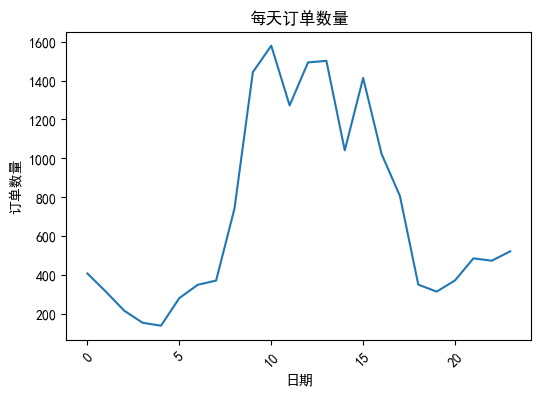

,子订单编号
订单提交时间小时,
0,408
1,315
2,217
3,155
4,140
5,282
6,350
7,372
8,742


In [29]:
#提取不同时间段表每天的每天客户提交订单表的数量
def datecount(data):
    data_day = data.groupby(by='订单提交时间天').agg({'子订单编号':'count'})
    return data_day
# datecount(data)
# datecount(data_month)
# datecount(data_cust_month)
datecount(data_week)

import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] ##设置中文显示
plt.rcParams["axes.unicode_minus"]=False ##负的坐标
# 绘制折线图
plt.figure(figsize=(6,4))
plt.plot(data_day.index, data_day['子订单编号'])
plt.xlabel('日期')
plt.ylabel('订单数量')
plt.title('每天订单数量')
plt.xticks(rotation=45)
plt.show()
data_day

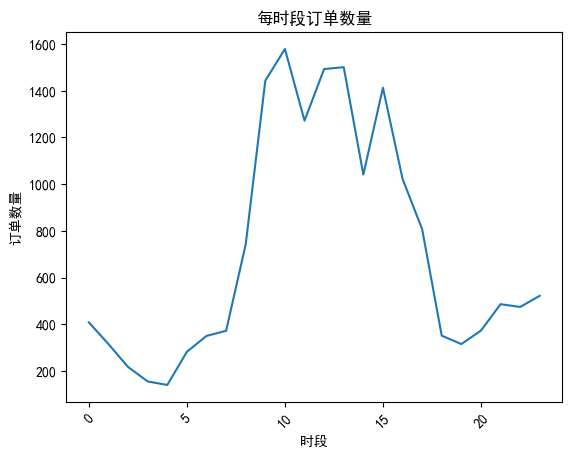

In [27]:
data_day = data_week.groupby(by='订单提交时间小时').agg({'子订单编号':'count'})
data_day
import matplotlib.pyplot as plt

# 假设data_week是包含订单数据的DataFrame，其中包含列'订单提交时间天'和'子订单编号'
data_day = data_week.groupby(by='订单提交时间小时').agg({'子订单编号':'count'})

# 绘制折线图
plt.plot(data_day.index, data_day['子订单编号'])
plt.xlabel('时段')
plt.ylabel('订单数量')
plt.title('每时段订单数量')

# 可选：设置X轴标签的间隔
plt.xticks(rotation=45)

plt.show()

In [ ]:
datecount(data_week)

In [15]:
#提取不同时间段表每时段客户提交订单表的数量
def hourcount(data):
    data_day = data.groupby(by='订单提交时间小时').agg({'子订单编号':'count'})
    return data_day
hourcount(data)
# hourcount(data_month)
# hourcount(data_cust_month)
# hourcount(data_week)

,子订单编号
订单提交时间小时,
0,4285
1,3195
2,2251
3,1669
4,1707
5,3181
6,4837
7,4760
8,4765


### 找出订单支付与支付完成的时间差

In [30]:
#把所有表的时间相关列改成时间格式
for j in ['订单完成时间', '支付完成时间','订单提交时间','承诺发货时间','发货时间']:
    data[j] = pd.to_datetime(data[j])
    data_month[j] = pd.to_datetime(data_month[j])
    data_cust_month[j] = pd.to_datetime(data_cust_month[j])
    data_week[j] = pd.to_datetime(data_week[j])

In [55]:
#查看支付时长是否有异常（空缺的已删除）
data1 = data.dropna(subset=['支付完成时间'])
data1['支付时长'] = (data1['支付完成时间'] - data1['订单提交时间']).dt.seconds
data1['支付时长'].value_counts()

C:\Users\yangqingqing\AppData\Local\Temp\ipykernel_4260\3297202654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['支付时长'] = (data1['支付完成时间'] - data1['订单提交时间']).dt.seconds


2       24791
1       13337
9        5644
10       5268
8        5175
        ...  
1573        1
273         1
365         1
361         1
1433        1
Name: 支付时长, Length: 598, dtype: int64

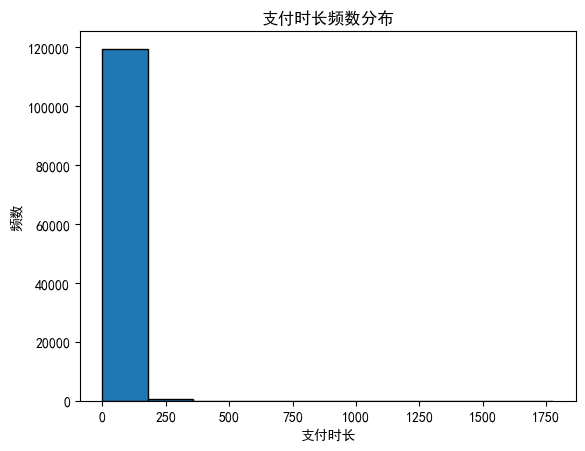

In [58]:
import matplotlib.pyplot as plt

# 绘制直方图
plt.hist(data1['支付时长'], bins=10, edgecolor='black')

# 设置图表标题和标签
plt.title('支付时长频数分布')
plt.xlabel('支付时长')
plt.ylabel('频数')

# 显示图表
plt.show()

### 每天真正成功交易的比例

In [49]:
data_buy = data_week.groupby(by=['订单提交时间天','订单状态']).agg({'订单状态':'count'})
#data_buy = order_7 = data_week['订单状态'].value_counts(normalize=True)
#data_buy['订单状态'].value_counts(normalize=True) 
data_buy.columns = ['计数']
# 计算每天各订单状态的比例
data_buy['比例'] = data_buy.groupby('订单提交时间天')['计数'].transform(lambda x: x / x.sum())

In [51]:
data_buy

计数        比例
订单提交时间天    订单状态                
2023-05-16 已关闭    401  0.234640
           已发货    703  0.411352
           已完成    605  0.354008
2023-05-17 已关闭    487  0.213784
           已发货   1371  0.601844
           已完成    420  0.184372
2023-05-18 已关闭    427  0.213607
           已发货   1261  0.630815
           已完成    311  0.155578
2023-05-19 已关闭    506  0.197502
           已发货   1751  0.683450
           已完成    305  0.119048
2023-05-20 已关闭    520  0.180807
           已发货   2128  0.739917
           已完成    228  0.079277
2023-05-21 已关闭    292  0.198504
           已发货   1166  0.792658
           已完成     13  0.008838
2023-05-22 已关闭    495  0.177165
           已发货   2206  0.789549
           已完成      3  0.001074
           待发货     90  0.032212
2023-05-23 已关闭    224  0.161733
           已发货    793  0.572563
           已完成      1  0.000722
           待发货    350  0.252708
           待支付     17  0.012274

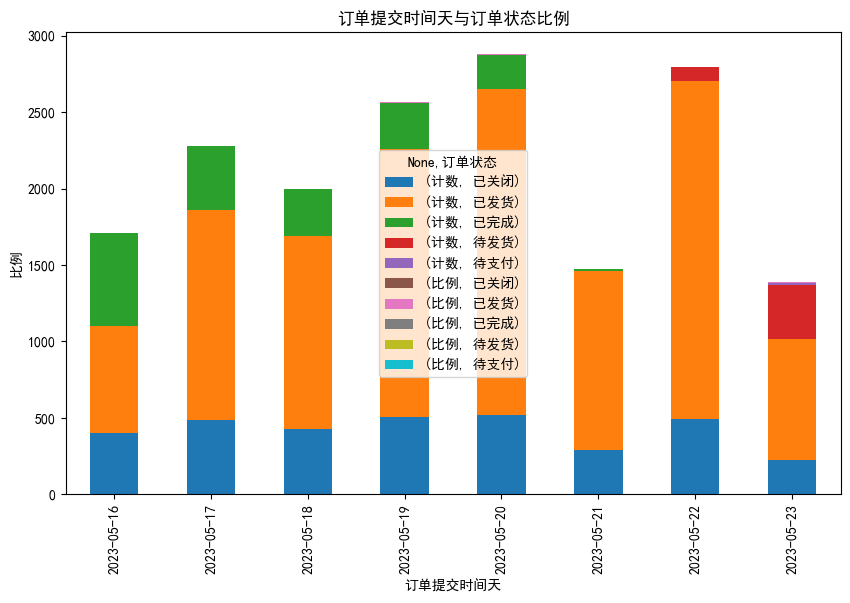

In [54]:
import matplotlib.pyplot as plt

# 创建数据透视表
data_buy = data_week.groupby(by=['订单提交时间天', '订单状态']).agg({'订单状态': 'count'})
data_buy.columns = ['计数']
data_buy['比例'] = data_buy.groupby('订单提交时间天')['计数'].transform(lambda x: x / x.sum())

# 创建图表
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制堆叠柱状图
data_buy.unstack().plot(kind='bar', stacked=True, ax=ax)

# 设置图表标题和标签
plt.title('订单提交时间天与订单状态比例')
plt.xlabel('订单提交时间天')
plt.ylabel('比例')

# 显示图表
plt.show()

<!--  data_month[j] = pd.to_datetime(data_month[j])
 data_cust_month[j] = pd.to_datetime(data_cust_month[j])
 data_week[j] = pd.to_datetime(data_week[j]) -->

In [34]:
#广告渠道分析
# data['广告渠道'].value_counts()
#data_month['广告渠道'].value_counts()
#data_cust_month['广告渠道'].value_counts()
data_week['广告渠道'].value_counts()

直播     8248
短视频    6320
无      2485
商品卡      21
Name: 广告渠道, dtype: int64

In [35]:
# 流量渠道分析
#data['流量渠道'].value_counts()
#data_month['流量渠道'].value_counts()
#data_cust_month['流量渠道'].value_counts()
data_week['流量渠道'].value_counts()

其他                 6851
短视频引流直播间           2839
直播推荐               2502
头条西瓜               1610
数据将于第二天更新          1436
短视频推荐               819
搜索                  587
购后页面                100
关注来源                 70
橱窗                   64
商城推荐                 60
个人主页&店铺&橱窗进入直播间      57
达人个人主页               41
店铺页面                 33
频道及活动页面               5
Name: 流量渠道, dtype: int64

In [36]:
# 支付方式分析
#data['支付方式'].value_counts()
#data_month['支付方式'].value_counts()
#data_cust_month['支付方式'].value_counts()
data_week['支付方式'].value_counts()

抖音支付    5056
支付宝     4826
抖音月付    4768
微信      2363
极速付       61
Name: 支付方式, dtype: int64

# 货品数据分析

In [60]:
#商品红、黑榜
#52天消费者购买商品数量前10(红榜)
data['选购商品'].value_counts().head(10) 
#52天消费者购买商品数量后10(黑榜)
data['选购商品'].value_counts().tail(10)
#30天消费者购买商品数量前10(红榜)
data_month['选购商品'].value_counts().head(10)
#30天消费者购买商品数量后10(黑榜)
data_month['选购商品'].value_counts().tail(10)
#15天消费者购买商品数量前10(红榜)
data_cust_month['选购商品'].value_counts().head(10)
#15天消费者购买商品数量后10(黑榜)
data_cust_month['选购商品'].value_counts().tail(10)
#7天消费者购买商品数量前10(红榜)
data_week['选购商品'].value_counts().head(10)
#7天消费者购买商品数量后10(黑榜)
data_week['选购商品'].value_counts().tail(10)
data['选购商品'].value_counts().head(10) 
data['选购商品'].value_counts().tail(10)

LIARJAN/莱尔健「减肚子必备」拉力绳+呼啦圈暴汗燃脂腹肌马甲线    3
LIARJAN/莱尔健呼啦圈 收腹减肥燃脂神器 专业美腰瘦腰肚子      3
专业级全能运动护膝，保护爱运动的你                     3
腹部拉力器 脚蹬腹部腰部训练器材家用 拉力绳拉力器腹肌马甲线        2
【只卖质量不卖价格】自动回弹腹肌肘撑健腹轮训练器男女健身塑形        2
LIARJAN/莱尔健「增肌+减脂组合」拉力绳+跳绳            2
LIARJAN/莱尔健【基础】家庭综合训练拉力绳，一套练全身肌肉      2
LIARJAN/莱尔健筋膜枪肌肉放松按摩锤成年人解压瘦腰腿健身器材     2
【第三代】瑜伽夹腿训练器 多功能夹腿健身瑜伽健身夹腿器           1
颈椎按摩枕重力指压颈部按摩器枕颈肩颈椎家用按摩枕头牵引矫正器        1
Name: 选购商品, dtype: int64

In [62]:
# 商品付款订单Top10
# 对数据框按照订单应付金额进行降序排序，选择前10个订单
top_10_orders52 = data.sort_values('订单应付金额', ascending=False).head(10)
top_10_orders30 = data_month.sort_values('订单应付金额', ascending=False).head(10)
top_10_orders15 = data_cust_month.sort_values('订单应付金额', ascending=False).head(10)
top_10_orders7 = data_week.sort_values('订单应付金额', ascending=False).head(10)
top_10_orders52['选购商品']

11541    【限量特惠专属】LIARJAN/莱尔健【标准】家庭综合训练拉力绳，一套练全身肌肉
40461    【限量特惠专属】LIARJAN/莱尔健【标准】家庭综合训练拉力绳，一套练全身肌肉
40451    【限量特惠专属】LIARJAN/莱尔健【标准】家庭综合训练拉力绳，一套练全身肌肉
40450    【限量特惠专属】LIARJAN/莱尔健【标准】家庭综合训练拉力绳，一套练全身肌肉
10292    【限量特惠专属】LIARJAN/莱尔健【标准】家庭综合训练拉力绳，一套练全身肌肉
28975    【限量特惠专属】LIARJAN/莱尔健【标准】家庭综合训练拉力绳，一套练全身肌肉
28976    【限量特惠专属】LIARJAN/莱尔健【标准】家庭综合训练拉力绳，一套练全身肌肉
28977    【限量特惠专属】LIARJAN/莱尔健【标准】家庭综合训练拉力绳，一套练全身肌肉
28978    【限量特惠专属】LIARJAN/莱尔健【标准】家庭综合训练拉力绳，一套练全身肌肉
28979    【限量特惠专属】LIARJAN/莱尔健【标准】家庭综合训练拉力绳，一套练全身肌肉
Name: 选购商品, dtype: object

In [63]:
# 订单状态分析
order_52 = data['订单状态'].value_counts(normalize=True)
order_30 = data_month['订单状态'].value_counts(normalize=True)
order_15 = data_cust_month['订单状态'].value_counts(normalize=True)
order_7 = data_week['订单状态'].value_counts(normalize=True)
order_52

已完成    0.680141
已关闭    0.233100
已发货    0.083513
待发货    0.003125
待支付    0.000121
Name: 订单状态, dtype: float64

In [40]:
#关闭的订单，与状态的比例
data['订单状态'].count()
a = pd.DataFrame(data['取消原因'].value_counts())
a['该原因占比'] = a['取消原因']/(data['订单状态'].count())
a

,取消原因,该原因占比
用户超时未支付自动取消,18342,0.130287
你已取消订单：暂时不需要这个商品,372,0.002642
你已取消订单：其他理由,147,0.001044
你已取消订单：余额不足/支付方式不全,97,0.000689
你已取消订单：收货地址选择/填写有误,74,0.000526
你已取消订单：商品规格/款式/数量错选,38,0.000270
你已取消订单：价格有点贵,25,0.000178
你已取消订单：无法使用/少用/错用优惠券,14,0.000099
你已取消订单：没有运费险/七天无理由退货等保障,8,0.000057
达人取消,2,0.000014


# 退款分析

In [41]:
#退款数量和金额
re_monney52 = data[data['售后状态']=='退款成功']
re_monney52['退款金额'] = (data[data['售后状态']=='退款成功']['订单应付金额']-data[data['售后状态']=='退款成功']['优惠总金额'])
re_monney52['退款金额'].sum()  #52天退款金额总计   结果875643.32
re_monney52['退款金额'].count() #52天退款数量总计   结果13685


re_monney30 = data_month[data_month['售后状态']=='退款成功']
re_monney30['退款金额'] = (data_month[data_month['售后状态']==
                                  '退款成功']['订单应付金额']-data_month[data_month['售后状态']=='退款成功']['优惠总金额'])
re_monney30['退款金额'].sum()  #30天退款金额总计   结果583285.6399999999
re_monney30['退款金额'].count() #30天退款数量总计   结果9102

re_monney15 = data_cust_month[data_cust_month['售后状态']=='退款成功']
re_monney15['退款金额'] = (data_cust_month[data_cust_month['售后状态']==
                                       '退款成功']['订单应付金额']-data_cust_month[data_cust_month['售后状态']=='退款成功']['优惠总金额'])
re_monney15['退款金额'].sum()  #15天退款金额总计   结果216312.05
re_monney15['退款金额'].count() #15天退款数量总计   结果3378

re_monney7 = data_week[data_week['售后状态']=='退款成功']
re_monney7['退款金额'] = (data_week[data_week['售后状态']==
                                '退款成功']['订单应付金额']-data_week[data_week['售后状态']=='退款成功']['优惠总金额'])
re_monney7['退款金额'].sum()  #7天退款金额总计   结果76045.63
re_monney7['退款金额'].count() #7天退款数量总计   结果1205



C:\Users\yangqingqing\AppData\Local\Temp\ipykernel_4260\3054405554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_monney52['退款金额'] = (data[data['售后状态']=='退款成功']['订单应付金额']-data[data['售后状态']=='退款成功']['优惠总金额'])
C:\Users\yangqingqing\AppData\Local\Temp\ipykernel_4260\3054405554.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_monney30['退款金额'] = (data_month[data_month['售后状态']==
C:\Users\yangqingqing\AppData\Local\Temp\ipykernel_4260\3054405554.py:15: SettingWithCopyWarning: 
A value is trying to be

1205

In [42]:
#退款趋势分析，每天退款数量统计
re_monney52.groupby(by='订单提交时间天').agg({'售后状态':'count'})    #统计52天每天退货数
re_monney30.groupby(by='订单提交时间天').agg({'售后状态':'count'})    #统计30天每天退货数
re_monney15.groupby(by='订单提交时间天').agg({'售后状态':'count'})    #统计15天每天退货数
re_monney7.groupby(by='订单提交时间天').agg({'售后状态':'count'})    #统计7天每天退货数

,售后状态
订单提交时间天,
2023-05-16,146
2023-05-17,192
2023-05-18,154
2023-05-19,178
2023-05-20,175
2023-05-21,104
2023-05-22,177
2023-05-23,79


In [43]:
# 退款订单来源渠道
re_monney52.groupby(by='广告渠道').agg({'售后状态':'count'}).sort_values(by='售后状态', ascending=False)  #退款订单广告渠道
re_monney52.groupby(by='流量体裁').agg({'售后状态':'count'}).sort_values(by='售后状态', ascending=False)  #退款订单流量体裁
re_monney52.groupby(by='流量渠道').agg({'售后状态':'count'}).sort_values(by='售后状态', ascending=False)  #退款订单流量渠道

,售后状态
流量渠道,
其他,5962
短视频引流直播间,3866
短视频推荐,1506
直播推荐,952
头条西瓜,549
搜索,367
购后页面,109
数据将于第二天更新,80
个人主页&店铺&橱窗进入直播间,67


In [44]:
#各商品和达人退款分析
re_monney52.groupby(by='广告渠道').agg({'售后状态':'count'}).sort_values(by='售后状态', ascending=False)

,售后状态
广告渠道,
短视频,6819
直播,5556
无,1310


# 时间分析

In [45]:
#下单到付款时间转化
data_pay_time52 = data[~data['支付完成时间'].isna()]
#提交到付款的平均时间
data_pay_time52['时间差']=(data_pay_time52['支付完成时间'] - data_pay_time52['订单提交时间']).dt.seconds
data_pay_time52['时间差'].mean()    #结果为17.663079168186794秒

data_pay_time30 = data_month[~data_month['支付完成时间'].isna()]
#提交到付款的平均时间
data_pay_time30['时间差']=(data_pay_time30['支付完成时间'] - data_pay_time30['订单提交时间']).dt.seconds
data_pay_time30['时间差'].mean()    #结果为17.9750549207711秒

data_pay_time15 = data_cust_month[~data_cust_month['支付完成时间'].isna()]
#提交到付款的平均时间
data_pay_time15['时间差']=(data_pay_time15['支付完成时间'] - data_pay_time15['订单提交时间']).dt.seconds
data_pay_time15['时间差'].mean()    #结果为17.338914750225804秒

data_pay_time7 = data_week[~data_week['支付完成时间'].isna()]
#提交到付款的平均时间
data_pay_time7['时间差']=(data_pay_time7['支付完成时间'] - data_pay_time7['订单提交时间']).dt.seconds
data_pay_time7['时间差'].mean()    #结果为16.677883000873127秒


C:\Users\yangqingqing\AppData\Local\Temp\ipykernel_4260\2288164889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pay_time52['时间差']=(data_pay_time52['支付完成时间'] - data_pay_time52['订单提交时间']).dt.seconds
C:\Users\yangqingqing\AppData\Local\Temp\ipykernel_4260\2288164889.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pay_time30['时间差']=(data_pay_time30['支付完成时间'] - data_pay_time30['订单提交时间']).dt.seconds
C:\Users\yangqingqing\AppData\Local\Temp\ipykernel_4260\2288164889.py:14: SettingWithCopyWarni

16.677883000873127

In [46]:
#转化时间与支付类型的关系
submit_pay=data_pay_time52.groupby(by=['时间差','支付方式']).agg({'支付方式':'count'}).sort_values(by='时间差', ascending=True)
submit_pay.columns = ['计数']
submit_pay['比例'] = submit_pay.groupby('时间差')['计数'].transform(lambda x: x/x.sum())
submit_pay

计数        比例
时间差  支付方式                
0    抖音支付    52  0.374101
     支付宝     87  0.625899
1    抖音支付  5978  0.448227
     抖音月付  5235  0.392517
     支付宝   2124  0.159256
...         ...       ...
1729 微信       1  1.000000
1734 支付宝      1  1.000000
1760 支付宝      1  1.000000
1771 支付宝      1  1.000000
1778 支付宝      1  1.000000

[1371 rows x 2 columns]

In [47]:
# 退款时间分析(数据中没有退款的时间显示，可以分析退款的，提交订单的时间)
re_monney_time52 = data[data['售后状态']=='退款成功']
re_monney_time52 = re_monney_time52.groupby(by=['订单提交时间小时']).agg({'支付方式':'count'}) 
re_monney_time52 = re_monney_time52.rename(columns={'支付方式': '退款订单数'})
re_monney_time52

# #查看支付时长是否有异常（空缺的已删除）
# data1 = data.dropna(subset=['支付完成时间'])
# data1['支付时长'] = (data1['支付完成时间'] - data1['订单提交时间']).dt.seconds
# data1['支付时长'].value_counts()

,退款订单数
订单提交时间小时,
0,384
1,315
2,217
3,172
4,203
5,374
6,466
7,427
8,406


In [48]:
re_monney_time52_1 = re_monney52.groupby(by=['订单提交时间小时','支付方式']).agg({'支付方式':'count'})  
re_monney_time52_1
re_monney_time52_1.columns = ['计数']
re_monney_time52_1['比例'] = re_monney_time52_1.groupby('订单提交时间小时')['计数'].transform(lambda x: x/x.sum())
re_monney_time52_1
# submit_pay.columns = ['计数']
# submit_pay['比例'] = submit_pay.groupby('时间差')['计数'].transform(lambda x: x/x.sum())
# submit_pay

计数        比例
订单提交时间小时 支付方式               
0        微信     43  0.111979
         抖音支付  129  0.335938
         抖音月付  123  0.320312
         支付宝    89  0.231771
1        微信     35  0.111111
...            ...       ...
22       支付宝   120  0.264901
23       微信     69  0.142562
         抖音支付  122  0.252066
         抖音月付  175  0.361570
         支付宝   118  0.243802

[96 rows x 2 columns]